In [113]:
import pandas as pd
import numpy as np

import sklearn
from sklearn import tree, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.externals import joblib

import matplotlib.pyplot as plt

%matplotlib inline 

# Loading data

In [65]:
inputPath = "/home/adeykin/projects/LeapRecorder/features5.csv"
data = pandas.read_csv(inputPath, sep=';', header=None)

In [66]:
data

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,1,0.393989,0.297971,-0.934539,4.07613,2.74760,2.62721,-2.44153,2.34461,-1.74171,...,1.622880,0.072570,2.97501,-2.68062,2.30565,0.320032,1.939350,0.276385,1.704830,0.268220
1,1,0.391948,0.297449,-0.932671,4.07426,2.74964,2.62627,-2.44017,2.34558,-1.74409,...,1.621800,0.071220,2.97590,-2.68154,2.30439,0.318675,1.938130,0.275206,1.704010,0.267108
2,1,0.384866,0.292667,-0.931224,4.07282,2.75673,2.62588,-2.44007,2.35063,-1.74579,...,1.618560,0.068380,2.97837,-2.68170,2.30126,0.312721,1.933990,0.271925,1.700130,0.264333
3,1,0.381452,0.290386,-0.930477,4.07207,2.76014,2.62551,-2.44676,2.35163,-1.74170,...,1.619030,0.077974,2.97727,-2.68132,2.30315,0.337526,1.936200,0.284015,1.702150,0.274011
4,1,0.376260,0.286675,-0.929756,4.07135,2.76533,2.62320,-2.45461,2.35968,-1.74345,...,1.617000,0.078729,2.97846,-2.68113,2.30117,0.339802,1.933470,0.285015,1.699410,0.274741
5,1,0.373810,0.284788,-0.929656,4.07125,2.76778,2.61961,-2.45405,2.36406,-1.74303,...,1.616270,0.079612,2.97890,-2.68087,2.30040,0.341814,1.932390,0.286070,1.698320,0.275591
6,1,0.362072,0.276367,-0.928061,4.06965,2.77952,2.61180,-2.44203,2.37280,-1.74171,...,1.609960,0.074951,2.98296,-2.68075,2.29503,0.329933,1.924890,0.280095,1.690860,0.270731
7,1,0.351738,0.268776,-0.926961,4.06855,2.78986,2.60592,-2.45950,2.38311,-1.74030,...,1.605170,0.073726,2.98591,-2.68037,2.29106,0.326032,1.919130,0.278282,1.684970,0.269290
8,1,0.340962,0.261330,-0.924898,4.06649,2.80063,2.60447,-2.49383,2.39269,-1.74089,...,1.601980,0.078800,2.98765,-2.68025,2.28869,0.338455,1.915090,0.284583,1.680430,0.274416
9,1,0.335733,0.257808,-0.923694,4.06529,2.80586,2.60384,-2.52043,2.39914,-1.74341,...,1.600300,0.081229,2.98852,-2.68033,2.28770,0.344785,1.913560,0.287670,1.678840,0.276888


In [77]:
labels = data[[0]].stack().unique()

num = 241
subsets = []

for l in labels:
    subsets.append( data[data[0] == l].sample(n=num) )
    
dataPrepared = pd.concat(subsets)
    

In [80]:
dataPrepared.to_csv('1.csv')

In [78]:
Y = dataPrepared[[0]].values
X = dataPrepared[range(1,43)].values

# Train

In [96]:
#from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.30, random_state=42)
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

In [103]:
for i in range(1,4):            
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier = classifier.fit(X_train, Y_train)    
    print "KNN learning succesfull finished " + str(i)
    #Y_train_actual = classifier.predict(X_train)
    Y_test_actual  = classifier.predict(X_test)

    print sklearn.metrics.classification_report(Y_test, Y_test_actual)
    #sklearn.metrics.average_precision_score(Y_test, Y_test_actual)
        

KNN learning succesfull finished 1
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        84
          3       0.95      0.99      0.97        82
          4       1.00      1.00      1.00        75
          6       0.99      0.96      0.97        73
          9       1.00      0.97      0.99        76
         12       1.00      1.00      1.00        60
         13       1.00      1.00      1.00        73
         14       1.00      1.00      1.00        69
         15       1.00      1.00      1.00        66
         16       0.98      1.00      0.99        64
         17       1.00      1.00      1.00        76
         18       1.00      1.00      1.00        65
         19       1.00      1.00      1.00        74
         21       1.00      1.00      1.00        76
         22       1.00      1.00      1.00        72

avg / total       0.99      0.99      0.99      1085

KNN learning succesfull finished 2
             precision    

In [107]:
classifier = GaussianNB()
classifier = classifier.fit(X_train, Y_train)    
print "Gauss learning succesfull finished "
#Y_train_actual = classifier.predict(X_train)
Y_test_actual  = classifier.predict(X_test)

print sklearn.metrics.classification_report(Y_test, Y_test_actual)

Gauss learning succesfull finished 
             precision    recall  f1-score   support

          1       0.97      0.99      0.98        84
          3       0.99      0.87      0.92        82
          4       0.90      1.00      0.95        75
          6       0.97      0.84      0.90        73
          9       0.84      0.82      0.83        76
         12       1.00      1.00      1.00        60
         13       0.99      0.99      0.99        73
         14       0.97      1.00      0.99        69
         15       0.80      0.89      0.84        66
         16       1.00      0.95      0.98        64
         17       1.00      1.00      1.00        76
         18       1.00      1.00      1.00        65
         19       1.00      0.93      0.97        74
         21       0.87      0.99      0.93        76
         22       1.00      1.00      1.00        72

avg / total       0.95      0.95      0.95      1085



In [108]:
classifier = svm.SVC()
classifier = classifier.fit(X_train, Y_train)    
print "SVC learning succesfull finished "
#Y_train_actual = classifier.predict(X_train)
Y_test_actual  = classifier.predict(X_test)

print sklearn.metrics.classification_report(Y_test, Y_test_actual)

SVC learning succesfull finished 
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        84
          3       1.00      0.99      0.99        82
          4       1.00      1.00      1.00        75
          6       0.99      1.00      0.99        73
          9       1.00      1.00      1.00        76
         12       1.00      1.00      1.00        60
         13       0.99      1.00      0.99        73
         14       1.00      1.00      1.00        69
         15       1.00      0.98      0.99        66
         16       1.00      1.00      1.00        64
         17       1.00      1.00      1.00        76
         18       1.00      1.00      1.00        65
         19       1.00      1.00      1.00        74
         21       1.00      1.00      1.00        76
         22       1.00      1.00      1.00        72

avg / total       1.00      1.00      1.00      1085



In [109]:
classifier = svm.NuSVC()
classifier = classifier.fit(X_train, Y_train)    
print "NuSVC learning succesfull finished "
#Y_train_actual = classifier.predict(X_train)
Y_test_actual  = classifier.predict(X_test)

print sklearn.metrics.classification_report(Y_test, Y_test_actual)

NuSVC learning succesfull finished 
             precision    recall  f1-score   support

          1       0.96      0.98      0.97        84
          3       1.00      0.87      0.93        82
          4       0.90      1.00      0.95        75
          6       0.68      0.89      0.77        73
          9       0.96      0.96      0.96        76
         12       1.00      1.00      1.00        60
         13       0.97      0.97      0.97        73
         14       0.97      1.00      0.99        69
         15       1.00      0.94      0.97        66
         16       1.00      0.91      0.95        64
         17       1.00      1.00      1.00        76
         18       1.00      1.00      1.00        65
         19       0.97      1.00      0.99        74
         21       1.00      0.92      0.96        76
         22       1.00      0.88      0.93        72

avg / total       0.96      0.95      0.95      1085



Linear SVC learning succesfull finished 
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        84
          3       0.93      1.00      0.96        82
          4       1.00      1.00      1.00        75
          6       0.96      0.95      0.95        73
          9       0.97      0.93      0.95        76
         12       1.00      1.00      1.00        60
         13       1.00      0.95      0.97        73
         14       0.99      1.00      0.99        69
         15       0.94      0.97      0.96        66
         16       0.98      1.00      0.99        64
         17       1.00      1.00      1.00        76
         18       0.97      1.00      0.98        65
         19       1.00      0.96      0.98        74
         21       1.00      0.99      0.99        76
         22       1.00      1.00      1.00        72

avg / total       0.98      0.98      0.98      1085

[[84  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 82

([<matplotlib.axis.YTick at 0x7fcbf1515fd0>,
 <a list of 15 Text yticklabel objects>)

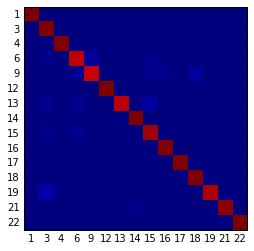

In [123]:
classifier = svm.LinearSVC()
classifier = classifier.fit(X_train, Y_train)    
print "Linear SVC learning succesfull finished "
#Y_train_actual = classifier.predict(X_train)
Y_test_actual  = classifier.predict(X_test)

print sklearn.metrics.classification_report(Y_test, Y_test_actual)

cm = sklearn.metrics.confusion_matrix(Y_test, Y_test_actual)

print cm
#normalization
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

classes = [1,3,4,6,9,12,13,14,15,16,17,18,19,21,22]
tick_marks = np.arange(len(classes))

plt.imshow(cm, interpolation='nearest')#, cmap=plt.cm.Blues)
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

In [111]:
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(X_train, Y_train)    
print "Linear SVC learning succesfull finished "
#Y_train_actual = classifier.predict(X_train)
Y_test_actual  = classifier.predict(X_test)

print sklearn.metrics.classification_report(Y_test, Y_test_actual)

Linear SVC learning succesfull finished 
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        84
          3       1.00      0.95      0.97        82
          4       0.99      1.00      0.99        75
          6       0.99      0.97      0.98        73
          9       1.00      0.97      0.99        76
         12       1.00      1.00      1.00        60
         13       1.00      1.00      1.00        73
         14       1.00      1.00      1.00        69
         15       0.94      0.98      0.96        66
         16       0.98      0.97      0.98        64
         17       1.00      1.00      1.00        76
         18       1.00      1.00      1.00        65
         19       0.96      1.00      0.98        74
         21       0.99      1.00      0.99        76
         22       1.00      1.00      1.00        72

avg / total       0.99      0.99      0.99      1085

